 **<font size=6 color="blue" > Maths for Machine Learning Assignment 2<font size color>**

**<font size=4>Ques no.: 1<font size>**

**<font size=2>simran rawat - MT2021136<font size>**

In [12]:
import numpy as np
import heapq
import matplotlib.pyplot as plot
from sklearn.metrics import mean_squared_error as mse


In [13]:
## Initialisation of random 10X10 matrix and making it symmetric
np.random.seed(1)
N = np.random.randint(9, size=(10, 10))
N_symmetric = N.T @ N
N_symmetric

array([[267, 222, 257, 162, 110, 180, 239, 236,  95, 187],
       [222, 298, 284, 131,  86, 144, 306, 278, 106, 174],
       [257, 284, 359, 201, 125, 202, 352, 289, 149, 217],
       [162, 131, 201, 156, 106, 128, 155, 137,  67, 134],
       [110,  86, 125, 106, 123, 102, 114, 102,  81, 115],
       [180, 144, 202, 128, 102, 179, 202, 159, 109, 114],
       [239, 306, 352, 155, 114, 202, 412, 319, 208, 219],
       [236, 278, 289, 137, 102, 159, 319, 339, 130, 215],
       [ 95, 106, 149,  67,  81, 109, 208, 130, 162, 123],
       [187, 174, 217, 134, 115, 114, 219, 215, 123, 236]])

**<font size=3> ANALYTICAL SOLUTION FOR TOP (5) EIGEN VALUES<font size>**

In [14]:


eigvalue, eigvector = np.linalg.eig(N_symmetric)
t = heapq.nlargest(5, eigvalue)
print(t)

[1944.093259318211, 183.76685706106738, 149.76788851461495, 108.8665067762453, 60.898018399413075]


**<font size=3> Power Iteration method <font size>**

In [15]:

def cal_eigen_values(A, x):
  return (x.T @ A @ x)/(x.T @ x)

def power_iteration_method(A, iter):
  ## random eigenvector matrix
  V = np.random.randint(10, size=(10, 10))

  ## QR Factorisation  OF V
  Q, R = np.linalg.qr(V)

  ##  finding the eigenvectors matrix iteratively
  for i in range(1, iter):
    P = A @ Q
    Q, R = np.linalg.qr(P)

  ## Calculation of eigen values
  eigvalues=[]
  for i in range(10):
    eigvalues.append(cal_eigen_values(A, (np.array(Q).T)[i]))


  t=heapq.nlargest(5, eigvalues)

  return t

In [16]:
err=[]
iters=[5, 10, 15, 20, 25, 30, 35, 40, 45, 50]

for i in iters:
  s = power_iteration_method(N_symmetric, i)
  err.append(mse(t, s))

print(err)

[44.29075950587116, 2.371457827833711, 2.3262986392164758e-05, 2.5298256051238373e-07, 0.00018738817198381562, 1.3978485911346551e-08, 1.5894389345349307e-08, 2.0332881647103263e-19, 2.964832345821658e-14, 2.4703971299688467e-16]


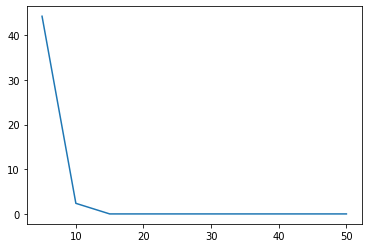

In [17]:
plot.plot(iters, err)
plot.show()